In [51]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from warnings import filterwarnings

In [31]:
# Importing Datasets
customers=pd.read_csv(r'Python casestudy/Credit card/Customer Acqusition.csv')
Repay=pd.read_csv(r'Python casestudy/Credit card/Repayment.csv',usecols = ["Customer","Month","Amount"])
Spend=pd.read_csv(r'Python casestudy/Credit card/Spend.csv',index_col='Sl No:')

In [32]:
customers

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [33]:
Repay

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1518,NaN,NaN,NaN
1519,NaN,NaN,NaN
1520,NaN,NaN,NaN
1521,NaN,NaN,NaN


In [34]:
Spend

,Customer,Month,Type,Amount
Sl No:,,,,
1,A1,12-Jan-04,JEWELLERY,485470.80
2,A1,3-Jan-04,PETRO,410556.13
3,A1,15-Jan-04,CLOTHES,23740.46
4,A1,25-Jan-04,FOOD,484342.47
5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...
1496,A67,4-Feb-06,BUS TICKET,356872.73
1497,A68,25-Mar-06,BUS TICKET,204971.10
1498,A69,31-Mar-06,BUS TICKET,50449.44


## (1) In the above dataset,
# (a) In case age is less than 18, replace it with mean of age values.

In [35]:
customers.loc[customers['Age']<16]=customers['Age'].mean()
customers

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3.0,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4.0,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5.0,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96.0,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97.0,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98.0,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99.0,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [36]:
Customer_spend=pd.merge(left=customers,right=Spend,how='inner',on='Customer')
Customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1459,96.0,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1460,97.0,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1461,98.0,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1462,99.0,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [37]:
Customer_spend.dtypes

No          float64
Customer     object
Age         float64
City         object
Product      object
Limit       float64
Company      object
Segment      object
Month        object
Type         object
Amount      float64
dtype: object

In [38]:
Customer_spend.loc[Customer_spend['Amount']>Customer_spend['Limit'],['Amount']]=(50 * Customer_spend["Limit"]).div(100)
Customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1459,96.0,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1460,97.0,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00
1461,98.0,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50
1462,99.0,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [39]:
Repayamount=pd.merge(left=customers,right=Repay,how='inner',on='Customer')
Repayamount

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...
1459,96.0,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1460,97.0,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1461,98.0,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57
1462,99.0,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,25682.73


In [40]:
Repayamount[Repayamount['Amount']>Repayamount['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
18,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,185955.07
19,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,412783.34
20,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,148038.67
21,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,179144.68
23,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Aug-05,381635.66
...,...,...,...,...,...,...,...,...,...,...
1450,87.0,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,462283.02
1459,96.0,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1460,97.0,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1461,98.0,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57


In [41]:
Repayamount.loc[Repayamount['Amount']>Repayamount['Limit'],['Amount']]=Repayamount['Limit']
Repayamount

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...
1459,96.0,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,100000.00
1460,97.0,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,10000.00
1461,98.0,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,10001.00
1462,99.0,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,10002.00


# 2. From the above dataset create the following summaries:
# a. How many distinct customers exist?

In [31]:
Distinct_cust=customers['Customer'].nunique()
Distinct_cust
print('The number of distinct customers is', Distinct_cust)

The number of distinct customers is 100


# b. How many distinct categories exist?

In [32]:
Distinct_categ=customers['Segment'].nunique()
Distinct_categ
print('The number of distinct customers is', Distinct_categ)

The number of distinct customers is 5


#  c. What is the average monthly spend by customers?

In [42]:
Spend.dtypes

Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [43]:
Spend['Month']=pd.to_datetime(Spend['Month'])

In [44]:
Spend['Monthly'] = Spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
Spend['Yearly'] = Spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [45]:
Spend

,Customer,Month,Type,Amount,Monthly,Yearly
Sl No:,,,,,,
1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
2,A1,2004-01-03,PETRO,410556.13,January,2004
3,A1,2004-01-15,CLOTHES,23740.46,January,2004
4,A1,2004-01-25,FOOD,484342.47,January,2004
5,A1,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...
1496,A67,2006-02-04,BUS TICKET,356872.73,February,2006
1497,A68,2006-03-25,BUS TICKET,204971.10,March,2006
1498,A69,2006-03-31,BUS TICKET,50449.44,March,2006


In [46]:
pd.pivot_table(data=Spend,values='Amount',index=['Yearly','Monthly'],aggfunc='mean')

Amount
Yearly Monthly                 
2004   April      235272.037143
       February   221215.270000
       January    251712.068664
       March      232146.119286
       May        217539.236429
       November   270486.397857
       September  310923.383571
2005   April      252181.326429
       August     233734.634286
       December   147503.060000
       February   229802.279821
       January    292741.372857
       July       229116.663571
       June       262688.112857
       May        245696.515429
       November   286143.322857
       October    194568.640714
       September  188666.202143
2006   April      232468.967553
       August     240699.717143
       December   270470.980714
       February   253858.260714
       January    282058.006429
       July       287505.098929
       June       177252.386429
       March      247166.084654
       May        236162.740357
       November   182841.290000
       October    236136.335000
       September  158520.090714

# d. What is the average monthly repayment by customers?


In [47]:
Repay=Repay.dropna()

In [48]:
Repay.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

In [56]:

Repay['Month']=pd.to_datetime(Repay['Month'])
Repay['Monthly'] = Repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
Repay['Year'] = Repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

C:\Users\NAGA GOWTHAM\AppData\Local\Temp\ipykernel_10248\3716161280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Repay['Month']=pd.to_datetime(Repay['Month'])
C:\Users\NAGA GOWTHAM\AppData\Local\Temp\ipykernel_10248\3716161280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Repay['Monthly'] = Repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
C:\Users\NAGA GOWTHAM\AppData\Local\Temp\ipykernel_10248\3716161280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [57]:
Repay

,Customer,Month,Amount,Monthly,Year
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004
2,A1,2004-01-15,259490.06,January,2004
3,A1,2004-01-25,437555.12,January,2004
4,A1,2005-01-17,165972.88,January,2005
...,...,...,...,...,...
1495,A67,2005-05-09,55638.77,May,2005
1496,A68,2006-05-10,319836.49,May,2006
1497,A69,2006-07-11,247628.45,July,2006
1498,A70,2005-08-12,454016.51,August,2005


In [58]:
pd.pivot_table(data=Repay,values='Amount',index=['Year','Monthly'],aggfunc='mean')

Amount
Year Monthly                 
2004 April      259141.679000
     February   256702.630741
     January    243489.649786
     March      252585.280667
     May        226162.720800
     November   209592.238000
     September  184487.848750
2005 April      212688.631333
     August     264430.921622
     December   320379.335833
     February   238829.265123
     January    240548.098148
     July       239871.479167
     June       210199.818333
     May        263207.367857
     November   256695.120000
     October    219849.956667
     September  247700.170000
2006 April      275472.251889
     August     224143.992500
     December   252736.569167
     February   284489.565128
     January    293475.389167
     July       257936.383243
     June       251990.453333
     March      240851.266814
     May        256920.884943
     November   199399.197407
     October    260765.480000
     September  262533.880833

#  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [59]:
customer_spend_repay = pd.merge(left=Customer_spend,right=Repay,on="Customer",how="inner")
pd.options.display.float_format = '{:.2f}'.format
customer_spend_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,Monthly,Year
0,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2004-01-12,495414.75,January,2004
1,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2004-01-03,245899.02,January,2004
2,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2004-01-15,259490.06,January,2004
3,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2004-01-25,437555.12,January,2004
4,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36305,96.00,A96,54.00,CHENNAI,Silver,100000.00,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,2004-01-25,310992.30,January,2004
36306,97.00,A97,58.00,TRIVANDRUM,Platimum,10000.00,C20,Govt,12-Jan-04,AUTO,5000.00,2004-01-12,121874.90,January,2004
36307,98.00,A98,51.00,CALCUTTA,Platimum,10001.00,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,2004-01-03,337815.57,January,2004
36308,99.00,A99,35.00,CALCUTTA,Platimum,10002.00,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,2004-01-15,25682.73,January,2004


In [60]:
customer_spend_repay=customer_spend_repay.rename(columns={'Amount_x':'Spend_amt','Amount_y':'Repay_amt'})

In [61]:
Interest=pd.pivot_table(data=customer_spend_repay,values=['Spend_amt','Repay_amt'],index=['Year','Monthly'],aggfunc='sum')
Interest

Repay_amt     Spend_amt
Year Monthly                              
2004 April      228540279.79  119451601.03
     February   160241901.43   76139224.98
     January   1643607587.28 1023825210.04
     March       89680114.48   48867300.90
     May        139909378.15   87202052.57
     November    78601165.15   47971703.48
     September   80161221.45   51442777.45
2005 April      174789435.58   93664047.03
     August     247532090.69  129065622.39
     December    99445330.31   43486381.25
     February   936913491.51  581981268.99
     January    170518627.26  125338513.30
     July        79972680.24   39956530.96
     June       221377389.20  117401872.05
     May       1044595598.57  665382120.54
     November   269399718.16  146153423.15
     October     60278299.98   31409930.29
     September   75177083.46   24881096.42
2006 April      604797747.12  315897832.74
     August      71670320.25   58496302.26
     December    70877020.16   45852216.30
     February   279232415.77  151335495.88
     January     89744912.04   51275743.91
     July       224572033.15  144409324.21
     June        69144309.96   53021183.95
     March     1100298543.04  711087752.86
     May        535448711.43  322661290.35
     November   134949839.20  111681138.32
     October     78909241.08   52858225.30
     September   80831988.18   53956805.72

In [62]:
Interest['MonthlyProfit']=Interest['Repay_amt']-Interest['Spend_amt']
Interest

Repay_amt     Spend_amt  MonthlyProfit
Year Monthly                                             
2004 April      228540279.79  119451601.03   109088678.76
     February   160241901.43   76139224.98    84102676.45
     January   1643607587.28 1023825210.04   619782377.24
     March       89680114.48   48867300.90    40812813.58
     May        139909378.15   87202052.57    52707325.58
     November    78601165.15   47971703.48    30629461.67
     September   80161221.45   51442777.45    28718444.00
2005 April      174789435.58   93664047.03    81125388.55
     August     247532090.69  129065622.39   118466468.30
     December    99445330.31   43486381.25    55958949.06
     February   936913491.51  581981268.99   354932222.52
     January    170518627.26  125338513.30    45180113.96
     July        79972680.24   39956530.96    40016149.28
     June       221377389.20  117401872.05   103975517.15
     May       1044595598.57  665382120.54   379213478.03
     November   269399718.16  146153423.15   123246295.01
     October     60278299.98   31409930.29    28868369.69
     September   75177083.46   24881096.42    50295987.04
2006 April      604797747.12  315897832.74   288899914.38
     August      71670320.25   58496302.26    13174017.99
     December    70877020.16   45852216.30    25024803.86
     February   279232415.77  151335495.88   127896919.89
     January     89744912.04   51275743.91    38469168.13
     July       224572033.15  144409324.21    80162708.94
     June        69144309.96   53021183.95    16123126.01
     March     1100298543.04  711087752.86   389210790.18
     May        535448711.43  322661290.35   212787421.08
     November   134949839.20  111681138.32    23268700.88
     October     78909241.08   52858225.30    26051015.78
     September   80831988.18   53956805.72    26875182.46

In [63]:
Interest['Monthly_Interest_Earned']=np.where(Interest['MonthlyProfit']>0,(2.9*Interest['MonthlyProfit'])/100,np.nan)
Interest

Repay_amt     Spend_amt  MonthlyProfit  \
Year Monthly                                                
2004 April      228540279.79  119451601.03   109088678.76   
     February   160241901.43   76139224.98    84102676.45   
     January   1643607587.28 1023825210.04   619782377.24   
     March       89680114.48   48867300.90    40812813.58   
     May        139909378.15   87202052.57    52707325.58   
     November    78601165.15   47971703.48    30629461.67   
     September   80161221.45   51442777.45    28718444.00   
2005 April      174789435.58   93664047.03    81125388.55   
     August     247532090.69  129065622.39   118466468.30   
     December    99445330.31   43486381.25    55958949.06   
     February   936913491.51  581981268.99   354932222.52   
     January    170518627.26  125338513.30    45180113.96   
     July        79972680.24   39956530.96    40016149.28   
     June       221377389.20  117401872.05   103975517.15   
     May       1044595598.57  665382120.54   379213478.03   
     November   269399718.16  146153423.15   123246295.01   
     October     60278299.98   31409930.29    28868369.69   
     September   75177083.46   24881096.42    50295987.04   
2006 April      604797747.12  315897832.74   288899914.38   
     August      71670320.25   58496302.26    13174017.99   
     December    70877020.16   45852216.30    25024803.86   
     February   279232415.77  151335495.88   127896919.89   
     January     89744912.04   51275743.91    38469168.13   
     July       224572033.15  144409324.21    80162708.94   
     June        69144309.96   53021183.95    16123126.01   
     March     1100298543.04  711087752.86   389210790.18   
     May        535448711.43  322661290.35   212787421.08   
     November   134949839.20  111681138.32    23268700.88   
     October     78909241.08   52858225.30    26051015.78   
     September   80831988.18   53956805.72    26875182.46   

                Monthly_Interest_Earned  
Year Monthly                             
2004 April                   3163571.68  
     February                2438977.62  
     January                17973688.94  
     March                   1183571.59  
     May                     1528512.44  
     November                 888254.39  
     September                832834.88  
2005 April                   2352636.27  
     August                  3435527.58  
     December                1622809.52  
     February               10293034.45  
     January                 1310223.30  
     July                    1160468.33  
     June                    3015290.00  
     May                    10997190.86  
     November                3574142.56  
     October                  837182.72  
     September               1458583.62  
2006 April                   8378097.52  
     August                   382046.52  
     December                 725719.31  
     February                3709010.68  
     January                 1115605.88  
     July                    2324718.56  
     June                     467570.65  
     March                  11287112.92  
     May                     6170835.21  
     November                 674792.33  
     October                  755479.46  
     September                779380.29

# f. What are the top 5 product types?

In [64]:
top_prod=pd.pivot_table(data=Spend,values='Amount',index='Type',aggfunc='sum').sort_values(by='Amount',ascending=False).head()
top_prod.reset_index()

,Type,Amount
0,PETRO,49863174.09
1,CAMERA,41481571.96
2,FOOD,37773338.43
3,TRAIN TICKET,33067077.15
4,AIR TICKET,32955445.42


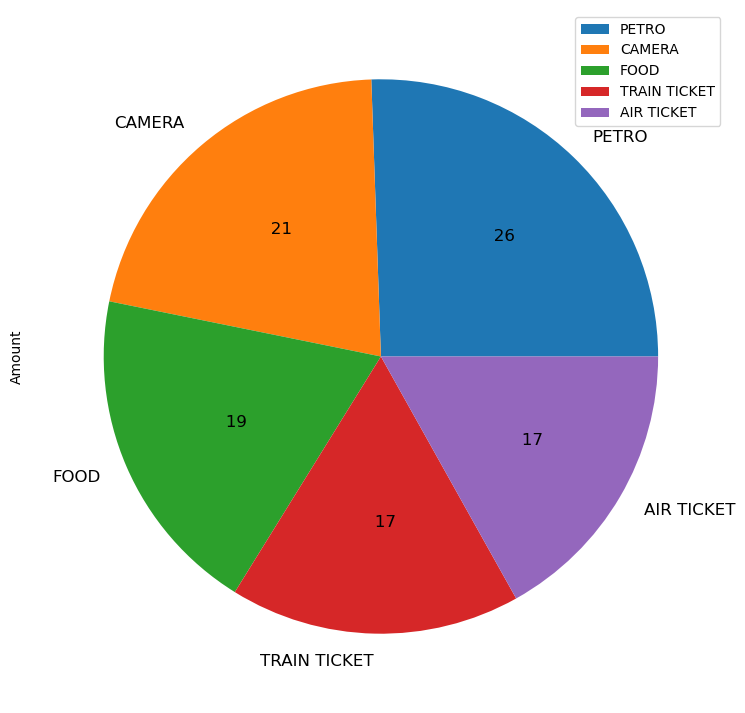

In [65]:
top_prod.Amount.plot(kind='pie',autopct='%5.0f',figsize=[20,9],fontsize=12)
plt.legend()
plt.show()

 ## g. Which city is having maximum spend?


In [66]:
City_max_spent=pd.merge(left=customers,right=Spend,on='Customer',how='inner')
City_max_spent

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Monthly,Yearly
0,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004
2,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004
3,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004
4,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,96.00,A96,54.00,CHENNAI,Silver,100000.00,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,January,2004
1460,97.00,A97,58.00,TRIVANDRUM,Platimum,10000.00,C20,Govt,2004-01-12,AUTO,139018.26,January,2004
1461,98.00,A98,51.00,CALCUTTA,Platimum,10001.00,C21,Normal Salary,2004-01-03,SHOPPING,284521.06,January,2004
1462,99.00,A99,35.00,CALCUTTA,Platimum,10002.00,C22,Self Employed,2004-01-15,AIR TICKET,90184.22,January,2004


In [67]:
max_spent=City_max_spent.groupby(by=['City'])[['Amount']].sum().sort_values('Amount',ascending=False).head()
max_spent=max_spent.reset_index()
max_spent

,City,Amount
0,BANGALORE,68540128.36
1,COCHIN,66420936.09
2,CALCUTTA,64415760.01
3,BOMBAY,50828266.74
4,CHENNAI,32674988.07


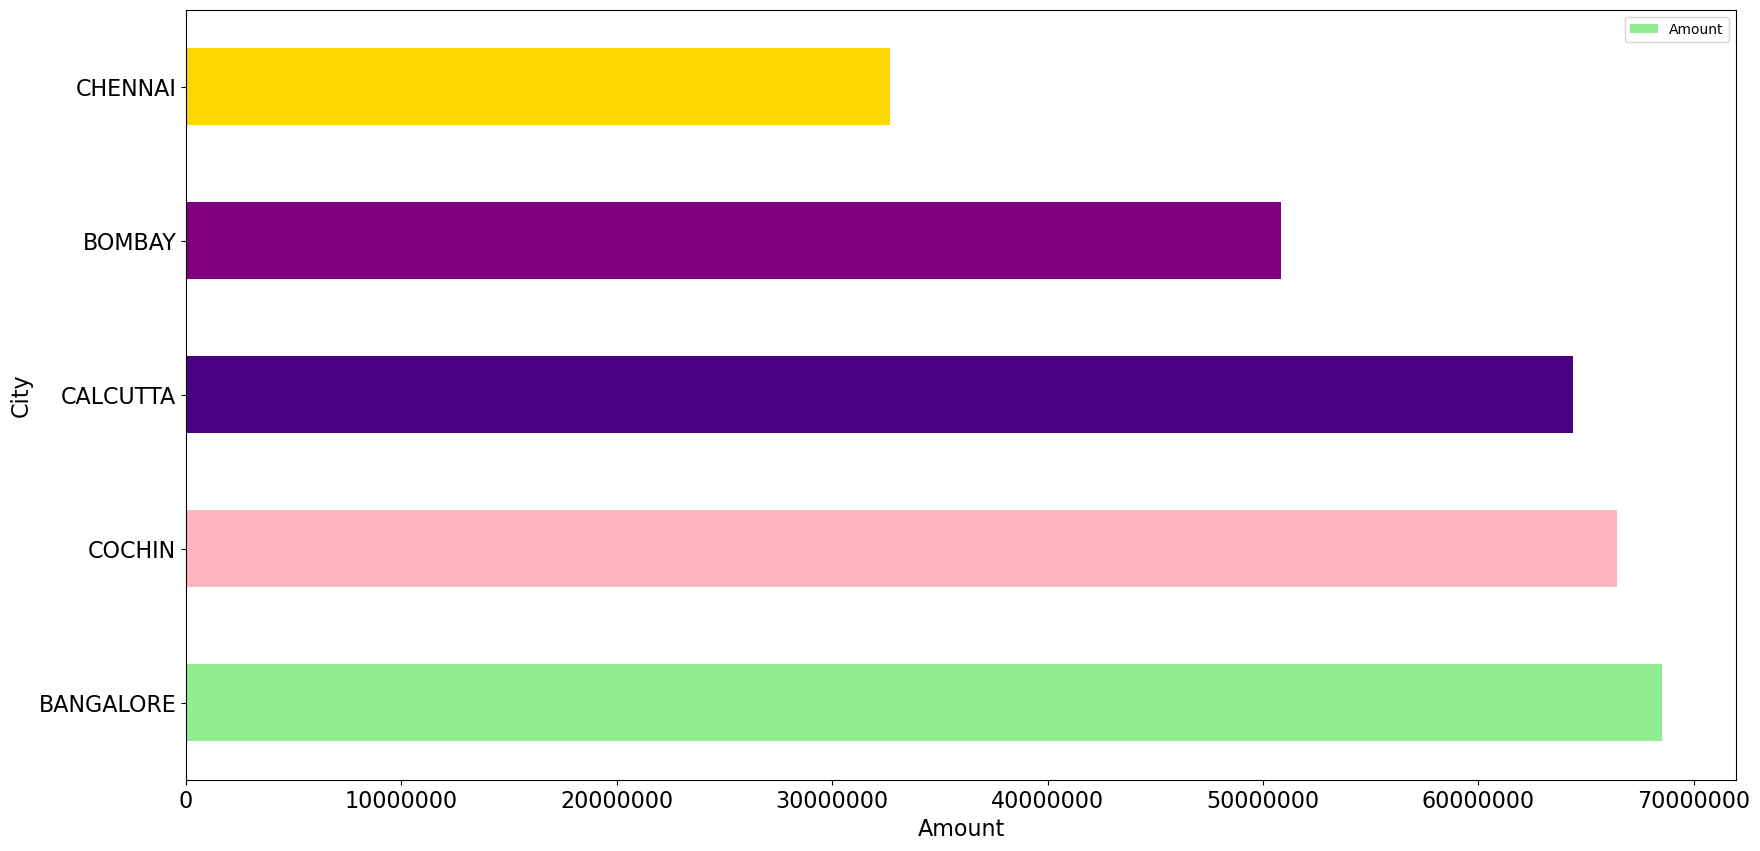

In [68]:
max_spent.plot(kind='barh',x='City',y='Amount',figsize=[20,10],color=['lightgreen','lightpink','indigo','purple','gold'])
plt.ticklabel_format(style='plain',axis='x')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Amount',fontsize=16)
plt.ylabel('City',fontsize=16)
plt.show()

# h. Which age group is spending more money?


In [69]:
Customer_spend['age_group']=np.where(((Customer_spend['Age']>=18)&(Customer_spend['Age']<30)),'Young',np.where(((Customer_spend['Age']>30)&(Customer_spend['Age']<60)),'Middle age','Old age'))
Customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,age_group
0,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,Old age
1,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,3-Jan-04,PETRO,410556.13,Old age
2,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,Old age
3,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,25-Jan-04,FOOD,484342.47,Old age
4,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,17-Jan-05,CAMERA,369694.07,Old age
...,...,...,...,...,...,...,...,...,...,...,...,...
1459,96.00,A96,54.00,CHENNAI,Silver,100000.00,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,Middle age
1460,97.00,A97,58.00,TRIVANDRUM,Platimum,10000.00,C20,Govt,12-Jan-04,AUTO,5000.00,Middle age
1461,98.00,A98,51.00,CALCUTTA,Platimum,10001.00,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,Middle age
1462,99.00,A99,35.00,CALCUTTA,Platimum,10002.00,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,Middle age


In [73]:
age_spent=pd.pivot_table(data=Customer_spend,values=['Amount'],index=['age_group'],aggfunc='sum')
pd.options.display.float_format = '{:.2f}'.format
age_spent=age_spent.reset_index()
age_spent

,age_group,Amount
0,Middle age,101861299.24
1,Old age,57293305.87
2,Young,52689898.21


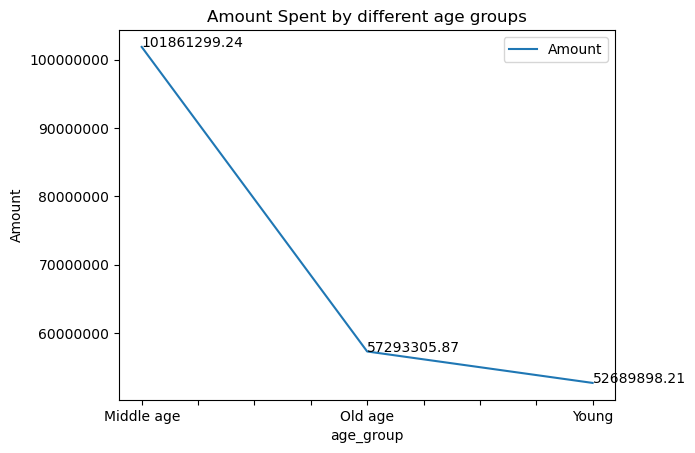

In [141]:
age_spent_plot=age_spent.plot(kind='line',x='age_group',y='Amount')
x=age_spent.index
y=age_spent['Amount']
for i, j in zip(x, y):
    plt.text(i, j, str(j))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('Amount')
plt.title('Amount Spent by different age groups')
plt.show()

# i. Who are the top 10 customers in terms of repayment?

In [142]:
Repayamount

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,12-Jan-04,495414.75
1,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,3-Jan-04,245899.02
2,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,15-Jan-04,259490.06
3,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,25-Jan-04,437555.12
4,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...
1459,96.00,A96,54.00,CHENNAI,Silver,100000.00,C19,Salaried_Pvt,25-Jan-04,100000.00
1460,97.00,A97,58.00,TRIVANDRUM,Platimum,10000.00,C20,Govt,12-Jan-04,10000.00
1461,98.00,A98,51.00,CALCUTTA,Platimum,10001.00,C21,Normal Salary,3-Jan-04,10001.00
1462,99.00,A99,35.00,CALCUTTA,Platimum,10002.00,C22,Self Employed,15-Jan-04,10002.00


In [143]:
top_cust=pd.pivot_table(data=Repayamount,values='Amount',index='Customer').sort_values(by='Amount',ascending=False).head(10)
top_cust

,Amount
Customer,
A89,497237.97
A80,481205.64
A92,459105.69
A95,369405.96
A65,349794.97
A93,342326.14
A82,342200.74
A54,309754.56
A13,308774.21


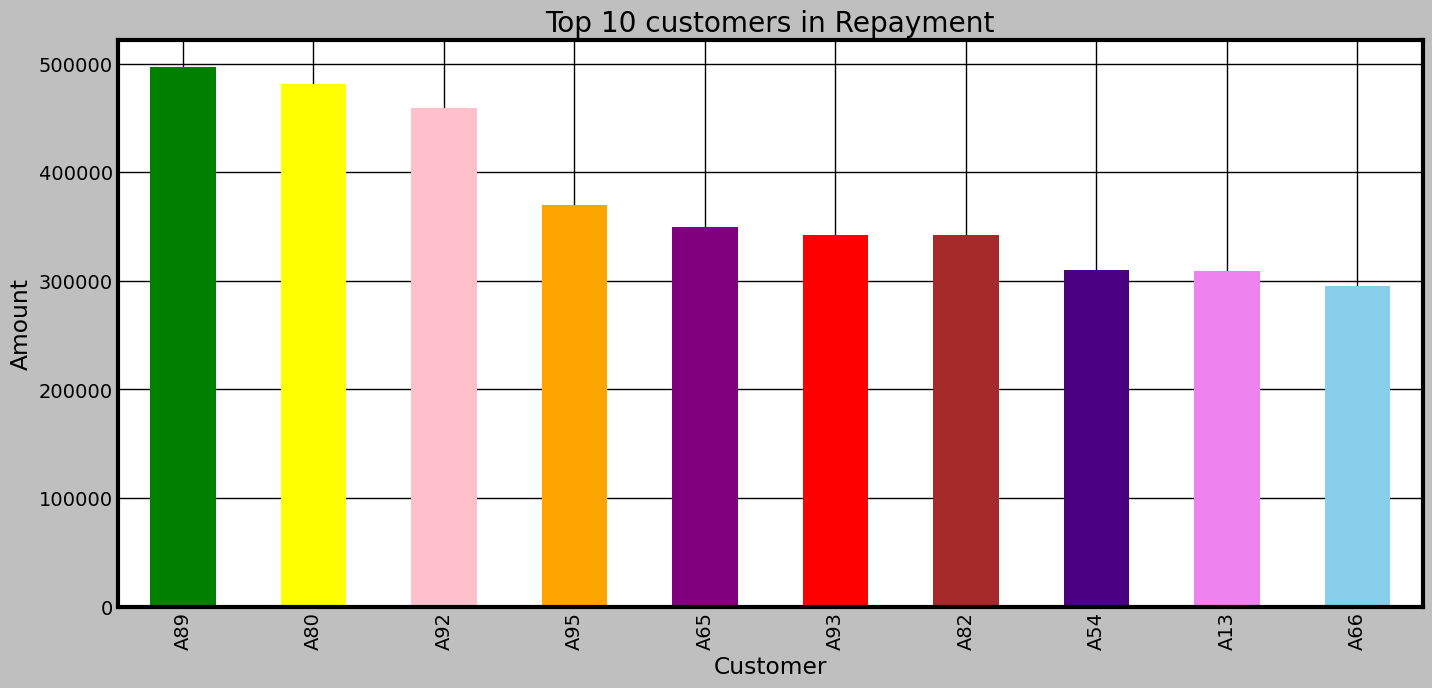

In [155]:
top_cust.Amount.plot(kind='bar',figsize=[15,7],legend=False,color=['green','yellow','pink','orange','purple','red','brown','indigo','violet','skyblue'])
plt.xlabel('Customer')
plt.style.use('fivethirtyeight')
plt.ylabel('Amount')
plt.title('Top 10 customers in Repayment')
plt.show()

# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.


In [151]:
City_max_spent

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Monthly,Yearly
0,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004
2,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004
3,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004
4,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,96.00,A96,54.00,CHENNAI,Silver,100000.00,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,January,2004
1460,97.00,A97,58.00,TRIVANDRUM,Platimum,10000.00,C20,Govt,2004-01-12,AUTO,139018.26,January,2004
1461,98.00,A98,51.00,CALCUTTA,Platimum,10001.00,C21,Normal Salary,2004-01-03,SHOPPING,284521.06,January,2004
1462,99.00,A99,35.00,CALCUTTA,Platimum,10002.00,C22,Self Employed,2004-01-15,AIR TICKET,90184.22,January,2004


In [152]:
city_wise_spend=pd.pivot_table(data=City_max_spent,index=['City','Yearly'],columns=['Product'],values='Amount',aggfunc='sum')
city_wise_spend

Product                  Gold    Platimum     Silver
City       Yearly                                   
BANGALORE  2004    9289878.54  6046763.93 6773901.65
           2005   12270552.49  7784194.68 3936068.22
           2006   11849918.33  5620904.86 4967945.66
BOMBAY     2004    6987853.53  5199581.00 3061805.08
           2005    8983018.28  5134074.48 2368375.97
           2006    7917144.31  7547549.72 3628864.37
CALCUTTA   2004    7477140.98  5961165.93 3321963.10
           2005   10303355.80  8810284.03 1285609.11
           2006   11167532.77 11305526.03 4783182.26
CHENNAI    2004    1059618.50  5558572.68 1156129.37
           2005    3740945.58  8868435.43 1000540.48
           2006    2704288.62  6921130.79 1665326.62
COCHIN     2004    7315850.15  7252922.98 4587738.70
           2005   12110613.03  7174075.81 2619231.25
           2006   10499142.38 10282111.92 4579249.87
DELHI      2004    2806495.00  1565199.90 4293224.28
           2005    1964845.27  2068490.16 2515127.59
           2006    2957103.32   764247.73 4581831.29
PATNA      2004    2072567.90  1113069.60 3398795.65
           2005    3252615.77  2883231.07 5244763.90
           2006    2276181.69  1256137.65 3111911.31
TRIVANDRUM 2004    2415102.84  3761433.87  786231.71
           2005    1240375.85  7186762.35 1445540.63
           2006    2735710.87  4174473.45 1800971.26

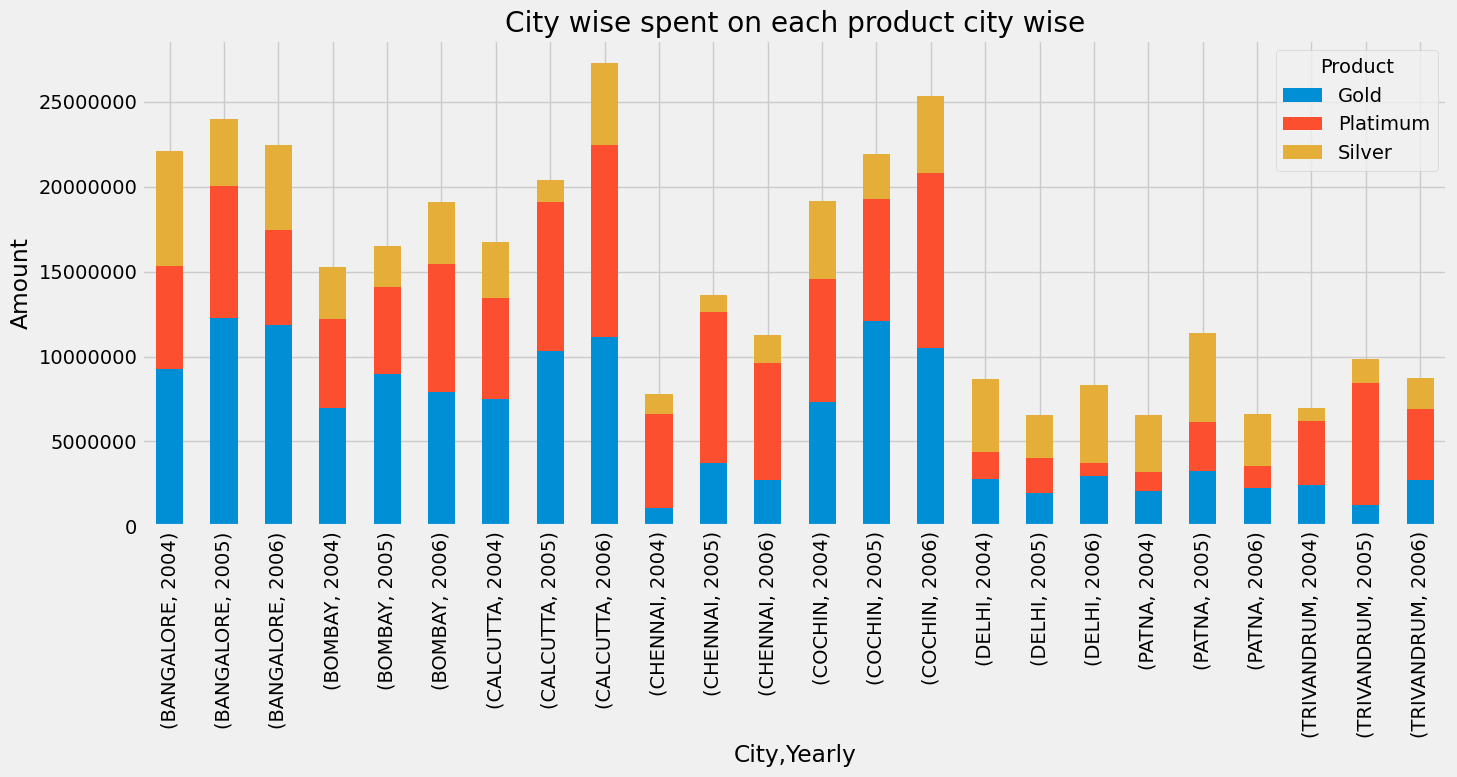

In [157]:
city_wise_spend.plot(kind='bar',stacked=True,figsize=[15,6])
plt.ylabel('Amount')
plt.ticklabel_format(style='plain',axis='y')
plt.title('City wise spent on each product city wise')
plt.show()

# 4. Create graphs for
# a. Monthly comparison of total spends, city wise


In [158]:
City_max_spent

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Monthly,Yearly
0,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004
2,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004
3,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004
4,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,96.00,A96,54.00,CHENNAI,Silver,100000.00,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,January,2004
1460,97.00,A97,58.00,TRIVANDRUM,Platimum,10000.00,C20,Govt,2004-01-12,AUTO,139018.26,January,2004
1461,98.00,A98,51.00,CALCUTTA,Platimum,10001.00,C21,Normal Salary,2004-01-03,SHOPPING,284521.06,January,2004
1462,99.00,A99,35.00,CALCUTTA,Platimum,10002.00,C22,Self Employed,2004-01-15,AIR TICKET,90184.22,January,2004


In [177]:
Monthlt_spent=pd.pivot_table(data=City_max_spent,values=['Amount'],index='Monthly',columns='City',aggfunc='sum').reset_index()
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
Monthlt_spent.index=pd.CategoricalIndex(data=Monthlt_spent['Monthly'],categories=sort_order,ordered=True)
Monthly_spent=Monthlt_spent.sort_index().drop(columns='Monthly')

C:\Users\NAGA GOWTHAM\AppData\Local\Temp\ipykernel_10248\2074966032.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Monthly_spent=Monthlt_spent.sort_index().drop(columns='Monthly')


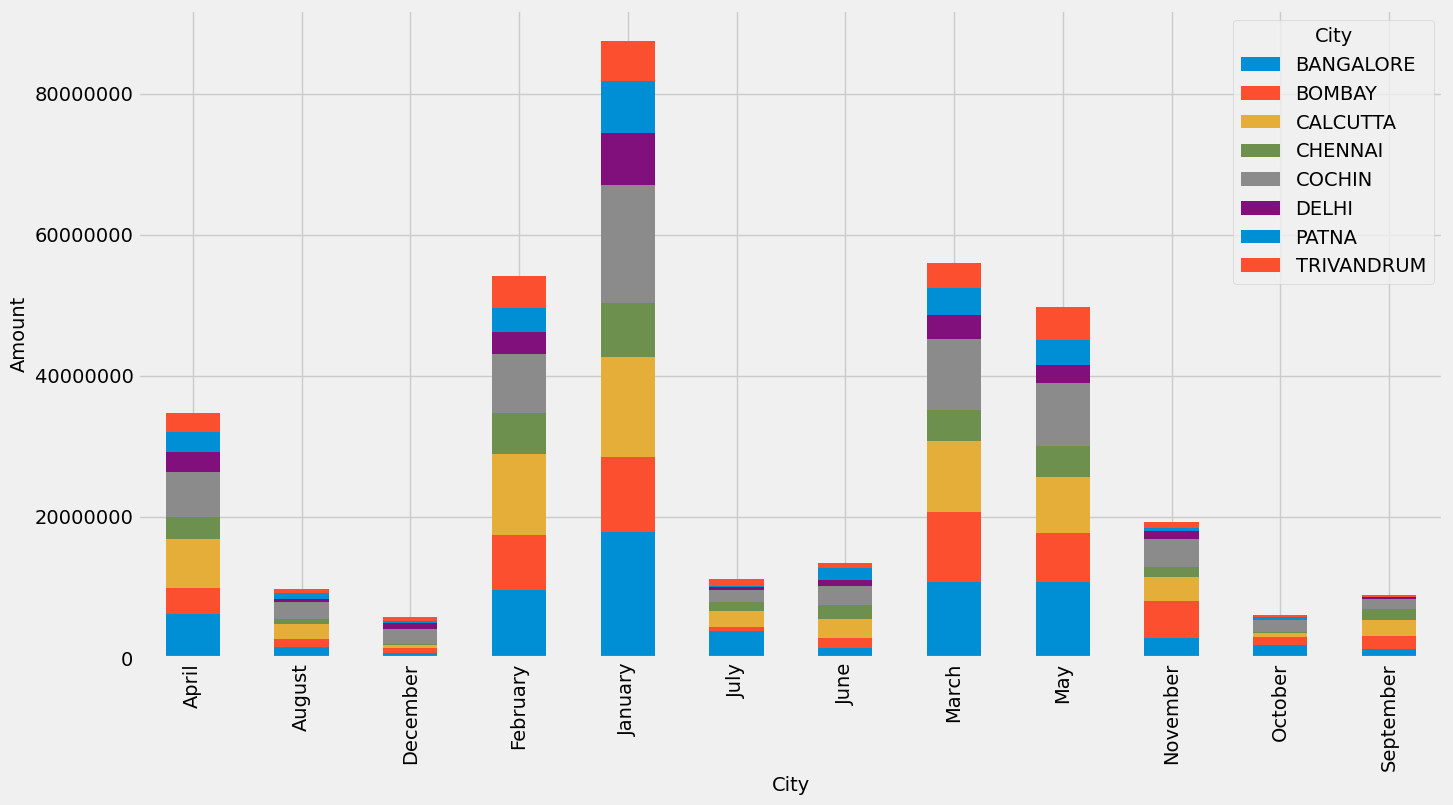

In [182]:
Monthlt_spent.Amount.plot(kind='bar',stacked=True,figsize=[15,8],fontsize=12)
plt.ylabel('Amount',fontsize=14)
plt.xlabel('City',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

# b. Comparison of yearly spend on air tickets

In [183]:
Air_Tickets=City_max_spent.loc[City_max_spent['Type']=='AIR TICKET']
Air_Tickets

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Monthly,Yearly
9,1.00,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,April,2006
63,5.00,A5,56.00,BANGALORE,Platimum,10002.00,C5,Normal Salary,2006-03-03,AIR TICKET,10763.44,March,2006
80,6.00,A6,70.00,DELHI,Silver,100000.00,C6,Self Employed,2006-04-03,AIR TICKET,357943.87,April,2006
97,7.00,A7,26.00,COCHIN,Silver,100001.00,C7,Salaried_MNC,2006-05-03,AIR TICKET,305050.62,May,2006
115,8.00,A8,67.00,PATNA,Silver,100002.00,C8,Salaried_Pvt,2006-06-03,AIR TICKET,173354.23,June,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,75.00,A75,36.00,BOMBAY,Silver,100003.00,C37,Self Employed,2005-02-23,AIR TICKET,217827.88,February,2005
1439,76.00,A76,66.00,BANGALORE,Silver,500000.00,C38,Self Employed,2005-02-03,AIR TICKET,30066.44,February,2005
1440,77.00,A77,35.00,BANGALORE,Silver,500000.00,C39,Self Employed,2006-02-04,AIR TICKET,31048.93,February,2006
1447,84.00,A84,70.00,PATNA,Silver,100000.00,C7,Govt,2006-03-27,AIR TICKET,124861.57,March,2006


In [242]:
Air_spent

,Yearly,Amount
0,2004,8370914.59
1,2005,13891275.53
2,2006,9944895.16


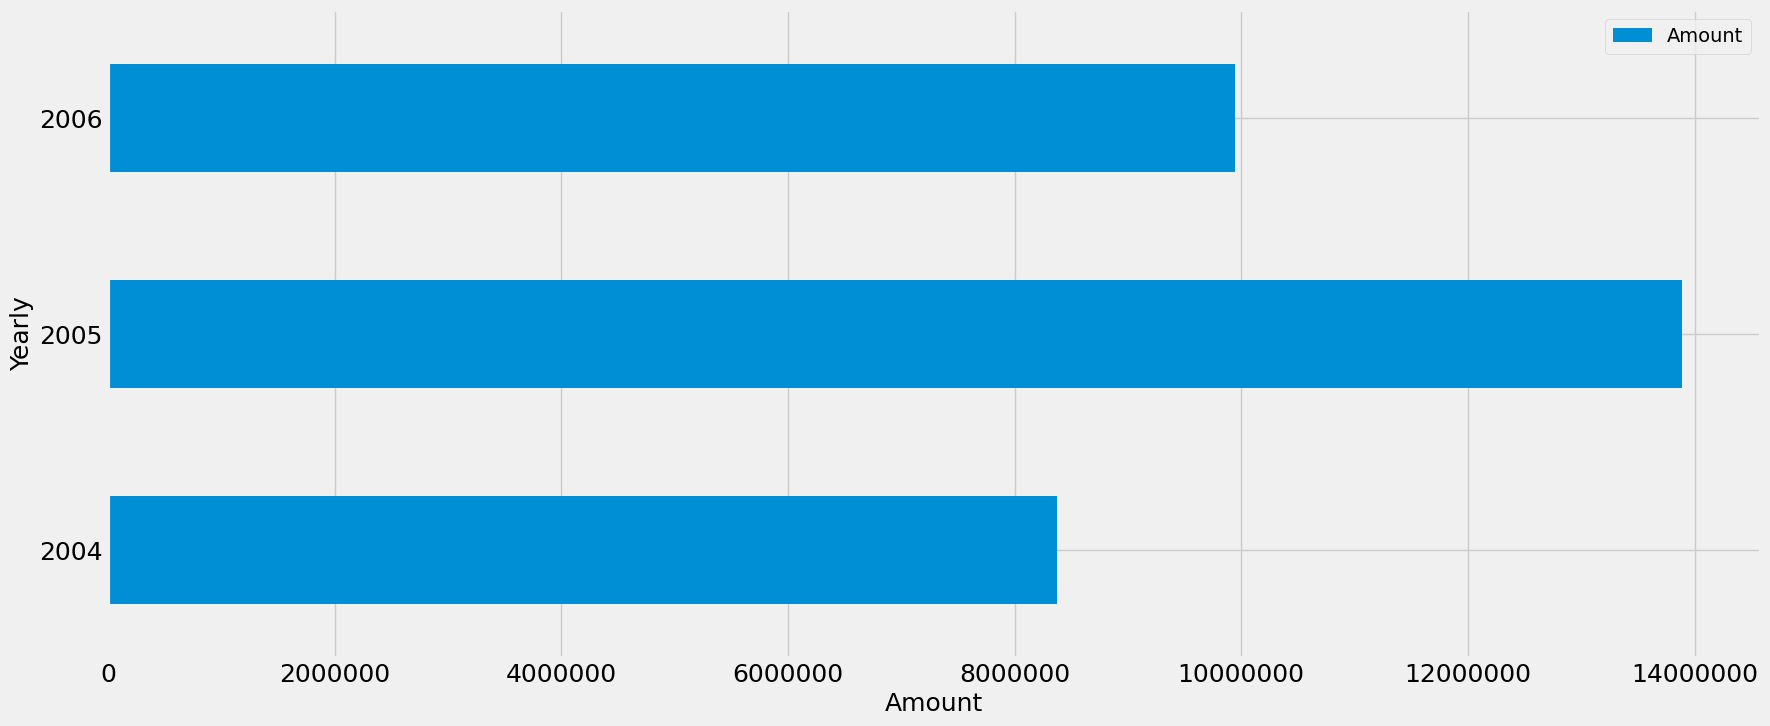

In [249]:
Air_spent=pd.pivot_table(data=Air_Tickets,values='Amount',index='Yearly',aggfunc='sum')
Air_spent=Air_spent.reset_index()
bar_plot=Air_spent.plot(kind='barh',x='Yearly',y='Amount',figsize=[19,8])
plt.ticklabel_format(style='plain',axis='x')
plt.xlabel('Amount',fontsize=18)
plt.ylabel('Yearly',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

#  c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


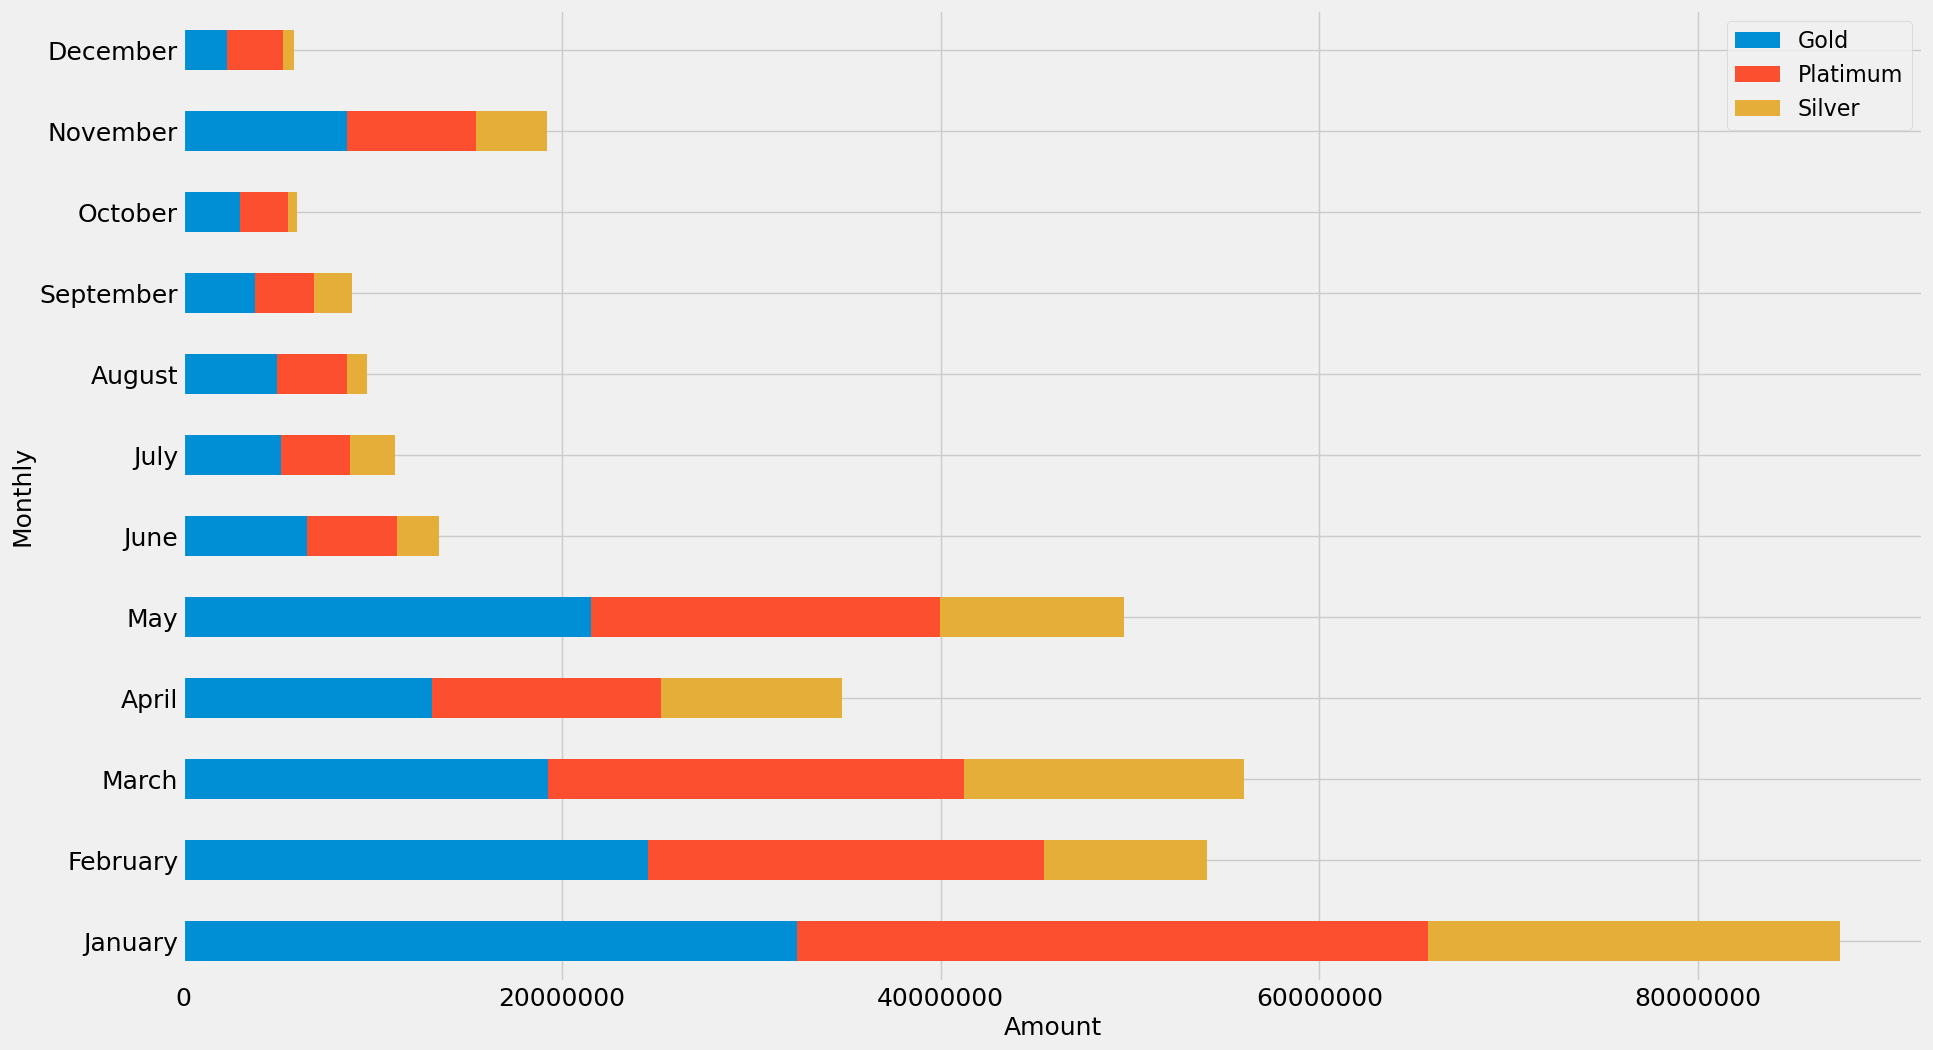

In [274]:
Month_spent_prod=pd.pivot_table(data=City_max_spent,values='Amount',index='Monthly',columns='Product',aggfunc='sum').reset_index()
Month_spent_prod.index=pd.CategoricalIndex(Month_spent_prod['Monthly'],categories=sort_order,ordered=True)
Month_spent_prod=Month_spent_prod.sort_index().drop(columns='Monthly')
Month_spent_prod.plot(kind='barh',stacked=True,figsize=[20,12])
plt.ticklabel_format(style='plain',axis='x')
plt.xlabel('Amount',fontsize=18)
plt.ylabel('Monthly',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.show()

# 5. Write user defined PYTHON function to perform the following analysis:
# You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [287]:
Customer_repay=pd.merge(left=Repay,right=customers,how='inner',on='Customer').drop(columns='No')
Customer_repay

,Customer,Month,Amount,Monthly,Year,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,495414.75,January,2004,76.00,BANGALORE,Gold,500000.00,C1,Self Employed
1,A1,2004-01-03,245899.02,January,2004,76.00,BANGALORE,Gold,500000.00,C1,Self Employed
2,A1,2004-01-15,259490.06,January,2004,76.00,BANGALORE,Gold,500000.00,C1,Self Employed
3,A1,2004-01-25,437555.12,January,2004,76.00,BANGALORE,Gold,500000.00,C1,Self Employed
4,A1,2005-01-17,165972.88,January,2005,76.00,BANGALORE,Gold,500000.00,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1459,A7,2005-11-22,55108.71,November,2005,26.00,COCHIN,Silver,100001.00,C7,Salaried_MNC
1460,A7,2005-12-03,429700.12,December,2005,26.00,COCHIN,Silver,100001.00,C7,Salaried_MNC
1461,A7,2005-02-23,344628.72,February,2005,26.00,COCHIN,Silver,100001.00,C7,Salaried_MNC
1462,A7,2006-03-31,336264.37,March,2006,26.00,COCHIN,Silver,100001.00,C7,Salaried_MNC


In [288]:
Customer_repay.dtypes
Customer_repay['Year']=Customer_repay.Yearastype(int)

In [363]:
def top_10_repay_cust(prod_data,time_period):
    
    prod_data=Customer_repay[Customer_repay['Product']==prod_data]
    
    if time_period == 'yearly':
        grouped = prod_data.groupby(['Customer','City','Product']).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)
    elif time_period == 'monthly':
        grouped = prod_data.groupby(['Customer','City','Product']).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)
    else:
        raise ValueError('Invalid time period. Must be either "yearly" or "monthly".')

    return grouped

In [367]:
top_10_repay_cust('Gold','yearly')

,Customer,City,Product,Amount
21,A61,COCHIN,Gold,10539142.91
20,A60,CALCUTTA,Gold,9876290.74
4,A13,BANGALORE,Gold,9572000.66
17,A43,BANGALORE,Gold,8489871.46
19,A45,COCHIN,Gold,8448334.87
3,A12,BOMBAY,Gold,8334760.16
5,A14,BANGALORE,Gold,7943268.63
18,A44,DELHI,Gold,7744730.12
16,A42,BOMBAY,Gold,7615460.86
9,A26,PATNA,Gold,7254687.09
